In [0]:
!pip -q install alpha_vantage

In [0]:
%matplotlib inline
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from alpha_vantage.sectorperformance import SectorPerformances
from alpha_vantage.cryptocurrencies import CryptoCurrencies
import matplotlib
import matplotlib.pyplot as plt
import os
# Make plots bigger
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

In [0]:
API_KEY = 'ROMEG9TLJF3H3UVL'

In [0]:
TICKER = 'EURUSD'
TIMEFRAME = '60min'

In [0]:
interested_currencies = ['EURUSD','USDJPY','GBPUSD','AUDUSD','USDCAD','USDCNY','USDCHF','EURGBP']

In [0]:
top_indicators=['SMA','EMA','VWAP','MACD','STOCH','RSI','ADX','CCI','AROON','BBANDS','AD','OBV']

In [0]:
test_indicators=['MFI','T3','TEMA','TRIMA','SAR','BOP']

# Working with time Series
We first download the data with our api key.

In [66]:
ts = TimeSeries(key=API_KEY, output_format='pandas')
data, meta_data = ts.get_intraday(symbol=TICKER,interval=TIMEFRAME, outputsize='full')
# We can describe it
data.describe()

,1. open,2. high,3. low,4. close,5. volume
count,1420.000000,1420.000000,1420.000000,1420.000000,1420.0
mean,1.110514,1.111317,1.109908,1.110507,0.0
std,0.010203,0.010026,0.010195,0.010235,0.0
min,1.090000,1.090000,1.090000,1.090000,0.0
25%,1.100000,1.100000,1.100000,1.100000,0.0
50%,1.110000,1.110000,1.110000,1.110000,0.0
75%,1.120000,1.120000,1.120000,1.120000,0.0
max,1.130000,1.130000,1.130000,1.130000,0.0


In [67]:
data.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2019-07-09 19:00:00,1.12,1.12,1.12,1.12,0.0
2019-07-09 20:00:00,1.12,1.12,1.12,1.12,0.0
2019-07-09 21:00:00,1.12,1.12,1.12,1.12,0.0
2019-07-09 22:00:00,1.12,1.12,1.12,1.12,0.0
2019-07-09 23:00:00,1.12,1.12,1.12,1.12,0.0


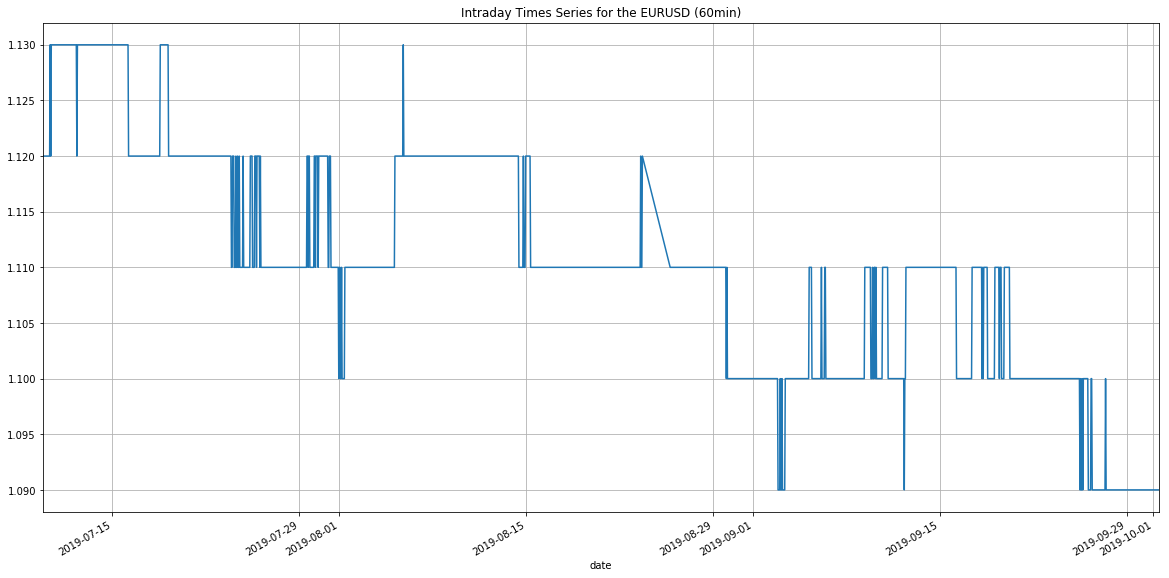

In [68]:
data.describe()
data['4. close'].plot()
plt.title('Intraday Times Series for the '+TICKER+' ('+TIMEFRAME+')')
plt.grid()
plt.show()

Check the meta data given back by the api call.

In [69]:
meta_data

{'1. Information': 'Intraday (60min) open, high, low, close prices and volume',
 '2. Symbol': 'EURUSD',
 '3. Last Refreshed': '2019-10-01 10:00:00',
 '4. Interval': '60min',
 '5. Output Size': 'Full size',
 '6. Time Zone': 'US/Eastern'}

# Working with technical indicators

In [70]:
ti = TechIndicators(key=API_KEY, output_format='pandas')
data2, meta_data2 = ti.get_bbands(symbol=TICKER, interval=TIMEFRAME, time_period=60)
data2.describe()

,Real Upper Band,Real Middle Band,Real Lower Band
count,1361.000000,1361.000000,1361.000000
mean,1.117154,1.110616,1.104074
std,0.009018,0.008951,0.010433
min,1.092700,1.090200,1.083800
25%,1.110000,1.104200,1.094500
50%,1.115900,1.110000,1.104100
75%,1.124400,1.118200,1.110400
max,1.136200,1.129800,1.127300


In [71]:
data2.head()

,Real Upper Band,Real Middle Band,Real Lower Band
date,,,
2019-07-12 06:00:00,1.1361,1.1277,1.1192
2019-07-12 07:00:00,1.1361,1.1278,1.1196
2019-07-12 08:00:00,1.1361,1.1278,1.1196
2019-07-12 09:00:00,1.1360,1.1280,1.1200
2019-07-12 10:00:00,1.1359,1.1282,1.1204


In [72]:
meta_data2

{'1: Symbol': 'EURUSD',
 '2: Indicator': 'Bollinger Bands (BBANDS)',
 '3: Last Refreshed': '2019-10-01 10:00:00',
 '4: Interval': '60min',
 '5: Time Period': 60,
 '6.1: Deviation multiplier for upper band': 2,
 '6.2: Deviation multiplier for lower band': 2,
 '6.3: MA Type': 0,
 '7: Series Type': 'close',
 '8: Time Zone': 'US/Eastern Time'}

## Plotting technical indicators

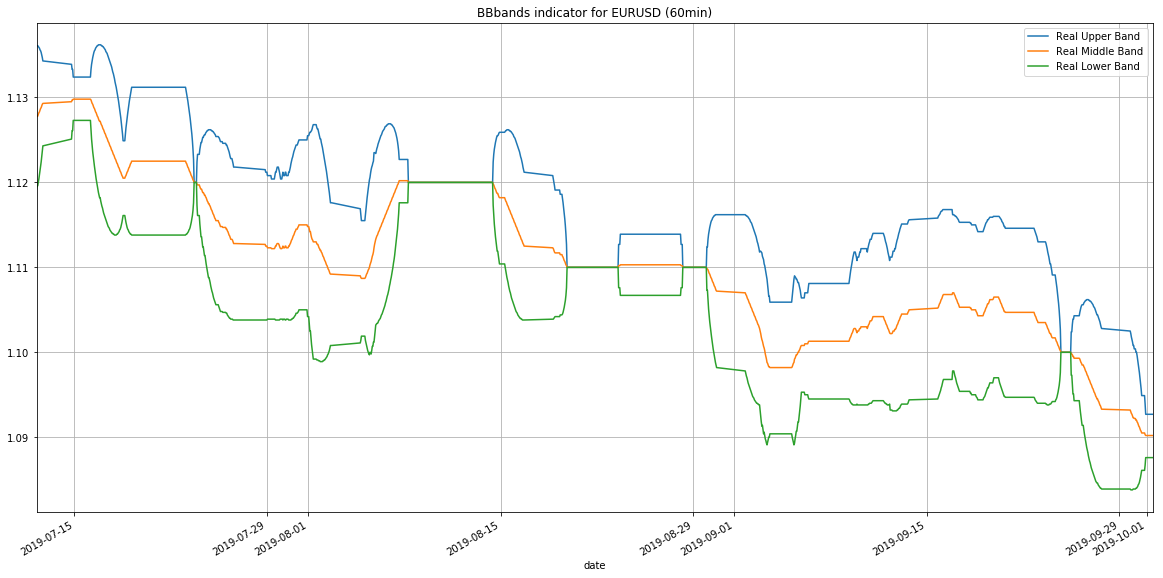

In [73]:
data2.plot()
plt.title('BBbands indicator for '+TICKER+' ('+TIMEFRAME+')')
plt.grid()
plt.show()

#mixing

In [0]:
import pandas as pd

merge=pd.merge(data['4. close'],data2, how='inner', left_index=True, right_index=True)

In [78]:
merge.head()

,4. close,Real Upper Band,Real Middle Band,Real Lower Band
date,,,,
2019-07-12 06:00:00,1.13,1.1361,1.1277,1.1192
2019-07-12 07:00:00,1.13,1.1361,1.1278,1.1196
2019-07-12 08:00:00,1.12,1.1361,1.1278,1.1196
2019-07-12 09:00:00,1.13,1.1360,1.1280,1.1200
2019-07-12 10:00:00,1.13,1.1359,1.1282,1.1204


## Plotting mix

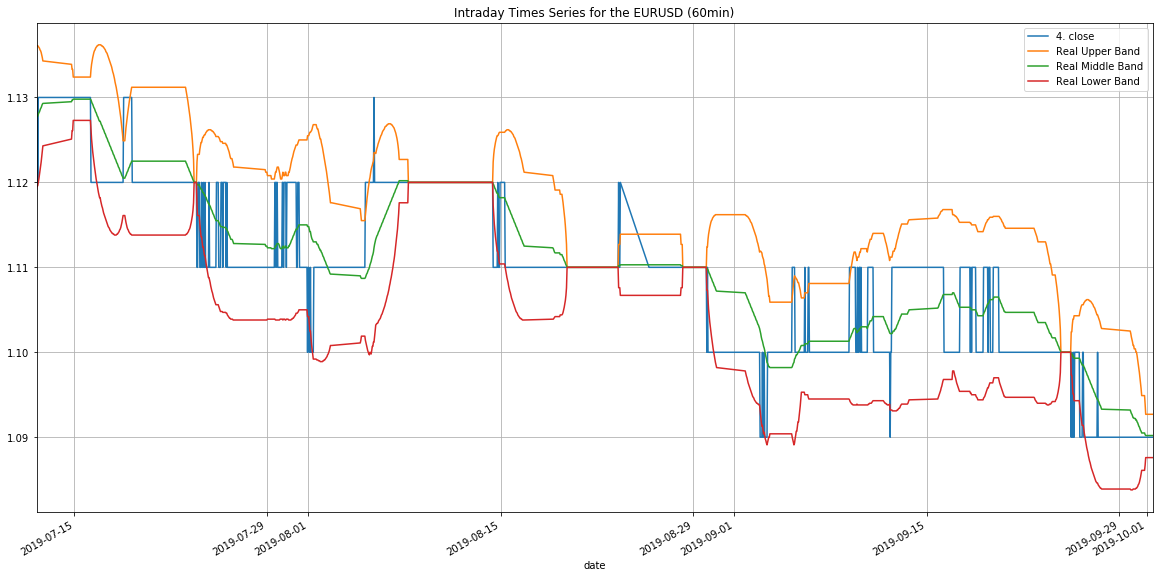

In [79]:
merge.plot()
plt.title('Intraday Times Series for the '+TICKER+' ('+TIMEFRAME+')')
plt.grid()
plt.show()

## Getting csv data

In [15]:
ts = TimeSeries(key=API_KEY, output_format='csv')
data_csv,_ = ts.get_intraday(symbol=TICKER,interval=TIMEFRAME, outputsize='compact')
data_csv

# Working with Crypto Currencies

To just get the current exchange rate

In [0]:
cc = CryptoCurrencies(key=API_KEY)

To get the intraday price of bitcoin 

In [30]:
# I changed the internal format of the the class to be our friendly data frame.
cc.output_format='pandas'
data, meta_data = cc.get_digital_currency_intraday(symbol='BTC', market='CNY')
data.describe()

AttributeError: ignored

In [0]:
data.head(5)

,1a. price (CNY),1b. price (USD),2. volume,3. market cap (USD)
date,,,,
2018-01-01 09:25:00,88187.41817,13507.550170,0.15565,2102.450184
2018-01-01 09:30:00,88187.41817,13507.550170,0.15565,2102.450184
2018-01-01 09:35:00,88187.41817,13553.116458,0.15565,2109.542577
2018-01-01 09:40:00,88187.41817,13553.116458,0.15565,2109.542577
2018-01-01 09:45:00,88542.86482,13607.743410,0.15975,2173.837010


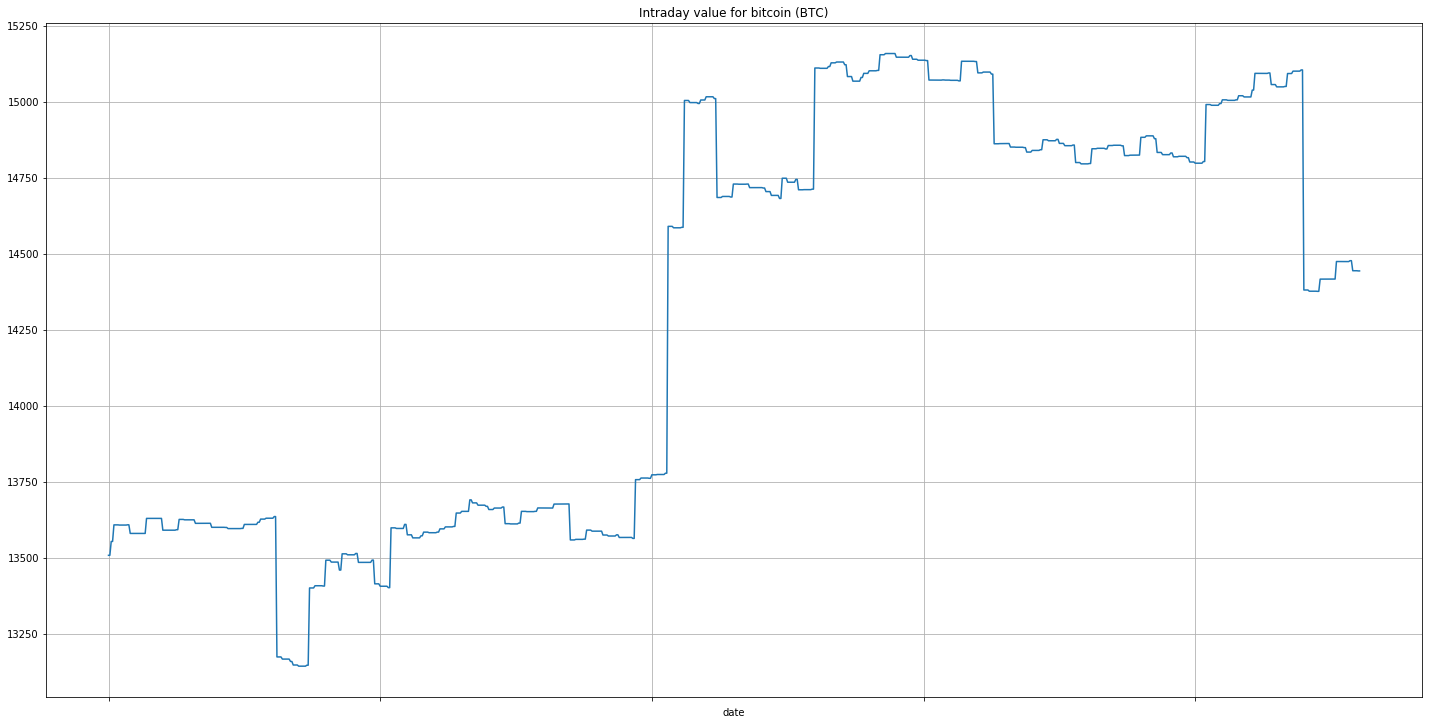

In [0]:
data['1b. price (USD)'].plot()
plt.tight_layout()
plt.title('Intraday value for bitcoin (BTC)')
plt.grid()
plt.show()

# Working with batch quotes

In [53]:
# It is still a TimeSeries call
ts.output_format='pandas'
data, meta_data = ts.get_batch_stock_quotes(symbols=('MSFT', 'FB', 'AAPL'))
data.describe()

,1. symbol,2. price,3. volume,4. timestamp
count,3,3,3,3
unique,3,3,3,3
top,AAPL,138.9900,12794665,2019-10-01 10:33:27
freq,1,1,1,1


In [18]:
data.head(3)

,1. symbol,2. price,3. volume,4. timestamp
date,,,,
1970-01-01 00:00:00.000000000,MSFT,139.1600,--,2019-09-30 15:59:57
1970-01-01 00:00:00.000000001,FB,178.0750,--,2019-09-30 15:59:55
1970-01-01 00:00:00.000000002,AAPL,225.0000,--,2019-10-01 09:20:18
